In [19]:
import math
import numpy as np
import datetime
import pandas as pd
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from matplotlib import style
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

C:\Users\Vyshnav Varma\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


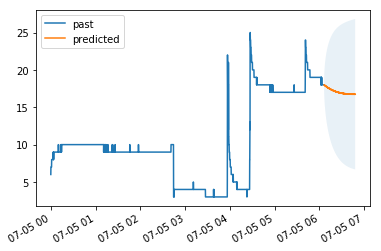

In [103]:
ch4 = pd.read_csv('ch4.csv',index_col=0)
# Create model object
ch4.index = pd.DatetimeIndex(ch4.index.values, freq='5S')

model = SARIMAX(ch4['CH4_ppm'], order=(1,0,1),seasonal_order=(1,1, 1, 8), trend='c')
# Fit model
results = model.fit()
# Create forecast object
forecast_object = results.get_forecast(steps=500)

# Extract prediction mean
mean = forecast_object.predicted_mean

# Extract the confidence intervals
conf_int = forecast_object.conf_int()

# Extract the forecast dates
time = mean.index

#Set lower bound for the confidence interval
for i in range(len(conf_int)):
    if conf_int.iloc[i]['lower CH4_ppm'] < 0:
        conf_int.iloc[i]['lower CH4_ppm'] = 0       

plt.figure()

# Plot past CH4 levels
plt.plot(ch4.index.values, ch4.values, label='past')

# Plot the prediction means as line
plt.plot(time, mean, label='predicted')

# Shade between the confidence intervals
plt.fill_between(time, conf_int.iloc[:,0], conf_int.iloc[:,1], alpha=0.1)

plt.gcf().autofmt_xdate()

# Plot legend and show figure
plt.legend()
plt.show()